<table><tr><font  color=navy size=3 face="微软雅黑">Here we will have an example of a single variable dataset to demonstrate the concept of a cost function.</font>
<br><tr><br>The data that will be used is the sulfur dioxide concentration (which cause acid rain) in the air related to the surface recession rate (which is an effect of acid rain) of marble tombstones.
<br>Data source:https://www.chegg.com/homework-help/questions-and-answers/1-read-r-use-response-variable-marble-tombstone-mean-surface-recession-rate-covariate-mean-q34698055

<br><font  color=navy size=3 face="微软雅黑">This dataset will be used for both cost function (gradient descent) and conjugate gradient.

### Data Layer

<table><tr><font color=navy  size=3 face="微软雅黑">First of all, we take a look at the data.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("multivariate-linear-regression-example1.xls", sep=",")

#Removing the label column
df = df [['Modelled_SO2_Concentration','Surface_Recession_Rate']]
dg = df
pd.set_option('display.width', 120)
print(df)

    Modelled_SO2_Concentration  Surface_Recession_Rate
0                           12                    0.27
1                           20                    0.14
2                           20                    0.33
3                           46                    0.81
4                           48                    0.84
5                           92                    1.08
6                           91                    1.78
7                           94                    1.21
8                          102                    1.09
9                          117                    1.72
10                         122                    1.18
11                         142                    1.01
12                         142                    1.90
13                         178                    1.98
14                         180                    1.53
15                         197                    2.71
16                         224                    2.41
17        

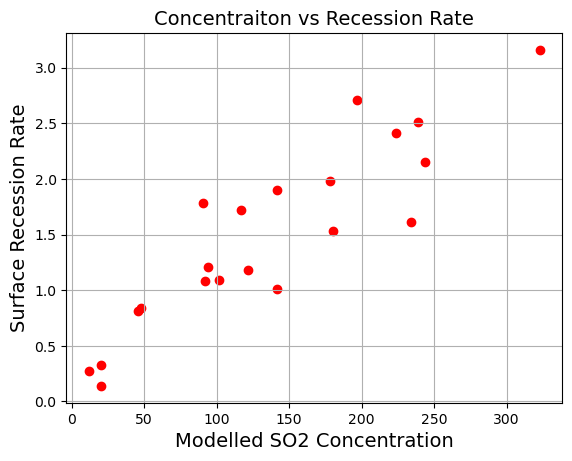

In [5]:
plt.scatter(df['Modelled_SO2_Concentration'], df['Surface_Recession_Rate'], color='red')
plt.title('Concentraiton vs Recession Rate', fontsize=14)
plt.xlabel('Modelled SO2 Concentration', fontsize=14)
plt.ylabel('Surface Recession Rate', fontsize=14)
plt.grid(True)
plt.show()

<table><tr><font color=white   size=3 face="微软雅黑">It is clear that the data is relatively well linearly correlated.
    

### Code Layer

In [8]:
df = df.to_numpy()
print(df)
X = df[:,0].reshape((-1, 1))
y = df[:,1].reshape((-1, 1))

[[1.20e+01 2.70e-01]
 [2.00e+01 1.40e-01]
 [2.00e+01 3.30e-01]
 [4.60e+01 8.10e-01]
 [4.80e+01 8.40e-01]
 [9.20e+01 1.08e+00]
 [9.10e+01 1.78e+00]
 [9.40e+01 1.21e+00]
 [1.02e+02 1.09e+00]
 [1.17e+02 1.72e+00]
 [1.22e+02 1.18e+00]
 [1.42e+02 1.01e+00]
 [1.42e+02 1.90e+00]
 [1.78e+02 1.98e+00]
 [1.80e+02 1.53e+00]
 [1.97e+02 2.71e+00]
 [2.24e+02 2.41e+00]
 [2.34e+02 1.61e+00]
 [2.39e+02 2.51e+00]
 [2.44e+02 2.15e+00]
 [3.23e+02 3.16e+00]]


<table><tr><font color=white   size=3 face="微软雅黑">
Reshape your data using array.reshape(-1, 1) if your data has a single feature.

As with all machine learning tasks where the scalar distance is involved, this data needs to be scaled, meaning that any feature which has a high numerical value does not dominate the fit. Note, the y value does not need to be scaled because it is a vector and hence any scalar operations can be thought of as being performed *in the units of* y. In fact, if one does scales Y, then information is lost about the units of Y. This does not need to be done to the first three examples because the sklearn package presumably already scales the data in the fit and unscales it automatically.
<br><br>The feature scaling here is as forllows:

In [10]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
print(scaler)

[[-1.03773585]
 [-0.96226415]
 [-0.96226415]
 [-0.71698113]
 [-0.69811321]
 [-0.28301887]
 [-0.29245283]
 [-0.26415094]
 [-0.18867925]
 [-0.04716981]
 [ 0.        ]
 [ 0.18867925]
 [ 0.18867925]
 [ 0.52830189]
 [ 0.54716981]
 [ 0.70754717]
 [ 0.96226415]
 [ 1.05660377]
 [ 1.10377358]
 [ 1.1509434 ]
 [ 1.89622642]]
RobustScaler()


<table><tr><font color=white   size=3 face="微软雅黑">Now, we define functions for cost funciton and gradient descent.

In [12]:
X = X_scaled
def  computeCost(theta,X,y):
    m = float(len(y))

    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

<table><tr><font color=white  size=3 face="微软雅黑">The cost function is defined as follows:<br>$$J:=\frac{1}{2m}\sum_{i=1}^m (h_{\theta}(x_i)-y_i)^2 $$ where m depends on the training set.
<br>Gradient descent is uesd to search the minimum and the definition is: <br>$$\theta:=\theta-\alpha\frac{\partial}{\partial \theta}J(\theta)$$
where $\alpha$ is a number called learning rate.

In [14]:
def gradient_descent(X,y,theta,alpha=0.1,iterations=200):
    m = float(len(y))
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):

        prediction = np.dot(X,theta)
        theta = theta -(1/m)*alpha*( X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)

    return theta, cost_history, theta_history

In [15]:
alpha =0.01
n_iter = 2000

theta = np.random.randn(2,1)
print(theta)
X_b = np.c_[np.ones((len(X),1)),X]
print(X_b)
print(computeCost(theta,X_b,y))

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,alpha,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

# plt.plot(cost_history)
# plt.xlabel("Iteration")
# plt.ylabel("$J(\Theta)$")
# plt.title("Cost function using Gradient Descent")
c=[]
print('theta_history is',theta_history)
for i in range(len(theta_history)):
    c.append([theta_history[i][0],theta_history[i][1]])


[[0.24870595]
 [1.09194986]]
[[ 1.         -1.03773585]
 [ 1.         -0.96226415]
 [ 1.         -0.96226415]
 [ 1.         -0.71698113]
 [ 1.         -0.69811321]
 [ 1.         -0.28301887]
 [ 1.         -0.29245283]
 [ 1.         -0.26415094]
 [ 1.         -0.18867925]
 [ 1.         -0.04716981]
 [ 1.          0.        ]
 [ 1.          0.18867925]
 [ 1.          0.18867925]
 [ 1.          0.52830189]
 [ 1.          0.54716981]
 [ 1.          0.70754717]
 [ 1.          0.96226415]
 [ 1.          1.05660377]
 [ 1.          1.10377358]
 [ 1.          1.1509434 ]
 [ 1.          1.89622642]]
0.6731863842232271
Theta0:          1.371,
Theta1:          0.911
Final cost/MSE:  0.060
theta_history is [[0.25968464 1.09232118]
 [0.27055303 1.09267507]
 [0.28131225 1.09301178]
 ...
 [1.37138146 0.91089648]
 [1.37138147 0.91089646]
 [1.37138148 0.91089644]]


<table><tr><font  color=white  size=3 face="微软雅黑">Note, a column of 1's is added to the data matrix to form the design matrix. This is necessary because the column of 1's multiplies with $\theta_0$ to provide the intercept of the fit.

<table><tr><font  color=white  size=3 face="微软雅黑">To view the process of gradient descent, here we plot the cost_history:

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\zjrph\AppData\Local\Temp\ipykernel_27404\3762527928.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


Text(0.5, 1.0, 'Cost function using Gradient Descent')

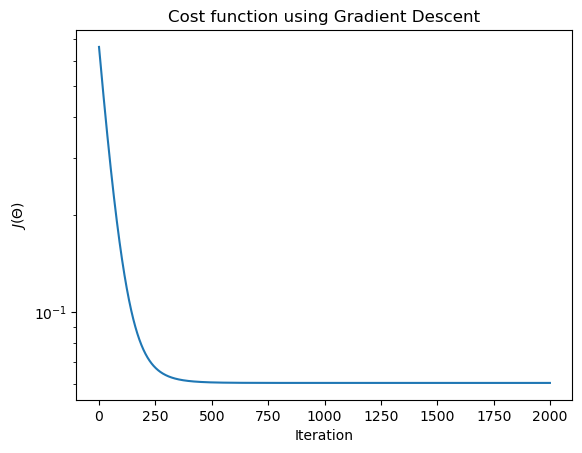

In [18]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.yscale("log")
plt.title("Cost function using Gradient Descent")

C:\Users\zjrph\AppData\Local\Temp\ipykernel_27404\4059453558.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x,y_grad,'b-',label='Gradient Descent',color='blue')


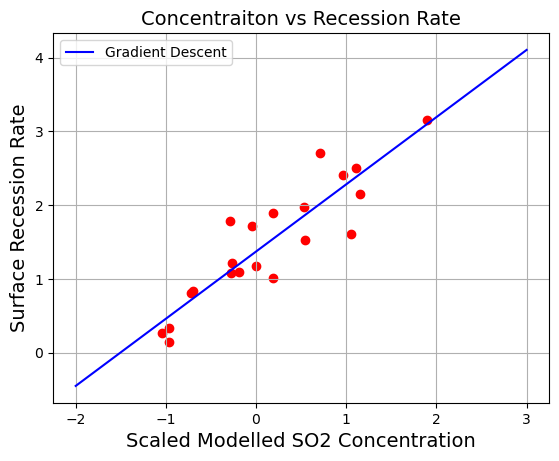

In [19]:
x = np.linspace(-2,3,100)
y_grad = 1.371+0.911*x

plt.scatter(X, y, color='red')
plt.plot(x,y_grad,'b-',label='Gradient Descent',color='blue')
plt.title('Concentraiton vs Recession Rate', fontsize=14)
plt.xlabel('Scaled Modelled SO2 Concentration', fontsize=14)
plt.ylabel('Surface Recession Rate', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


<table><tr><font  color=white  size=3 face="微软雅黑">The figure shows that in gradient descent, the cost function rapidly drops and then slows after many iterations, i.e. the rate of descent slows as the optimum value is approached.

<table><tr><font color=white   size=3 face="微软雅黑">As the figure shows, the conjugate gradient descent method converges much quicker, and converges to a smaller value.

### 3D plot

<table><tr><font color=navy  size=3 face="微软雅黑">Here, we try to show the cost function in $\theta$-space.

In [24]:
def computeCost2(theta0,theta1):
    J = 0
    m = len(X)
    for i in range(m):
        J=J+(1/(2*m)) * np.square(theta0+X[i]*theta1-y[i])
    return J

In [25]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


A=theta_history[:,0].tolist() #theta0
B=theta_history[:,1].tolist()  #theta1
A1=np.linspace(-1.5,3,100).tolist()# To make the surface complete
B1=np.linspace(-1.5,3,100).tolist()

A1,B1= np.meshgrid(A1,B1)
C=computeCost2(A1,B1)

<table><tr><font color=navy  size=3 face="微软雅黑">Note that the single red point in the bottom is the cost function we got previously.
<br>The figure shows how the cost function changes in the $\theta$-space and its minimum accords with the single point.

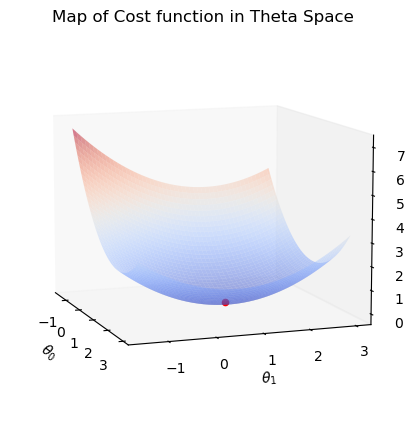

In [27]:
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook



#rc('text', usetex=True)
fig = plt.figure(figsize=(8,5))
ax1 = plt.axes(projection='3d')
ax1.set_facecolor('white')
ax1.grid(False)
ax1.set_title('Map of Cost function in Theta Space')
ax1.set_xlabel(r"$\theta_0$")
ax1.set_ylabel(r"$\theta_1$")
ax1.set_zlabel(r"$J(\theta)$")
surf1 = ax1.plot_surface(A1, B1, C,alpha=0.5,cmap=cm.coolwarm)
s2 = ax1.scatter(1.371,0.911,computeCost2(1.371,0.911),c='r')     #plot the single point using the 'theta's we got previously
ax1.view_init(10, -20)
plt.show()